In [1]:
# import sklearn
# assert sklearn.__version__>="1.0.1"

In [2]:
# from pathlib import Path
# import pandas as pd
# import tarfile
# import urllib.request

# def load_housing_data():
#     tarball_path = Path("datasets/housing.tgz")
#     if not tarball_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/ageron/data/raw/main/housing.tgz"
#         urllib.request.urlretrieve(url, tarball_path)
#         with tarfile.open(tarball_path) as housing_tarball:
#             housing_tarball.extractall(path="datasets")
#     return pd.read_csv(Path("datasets/housing/housing.csv"))

# housing = load_housing_data()

#### 1.1. 데이터 불러오기 split하기

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "http://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
# fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 1.2. 데이터 기본 정보 파악하기1 - 기술통계

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 1.3. 데이터 특성 파악하기2 - 시각화

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '위/경도에 따른 산점도 (밀집지역)')

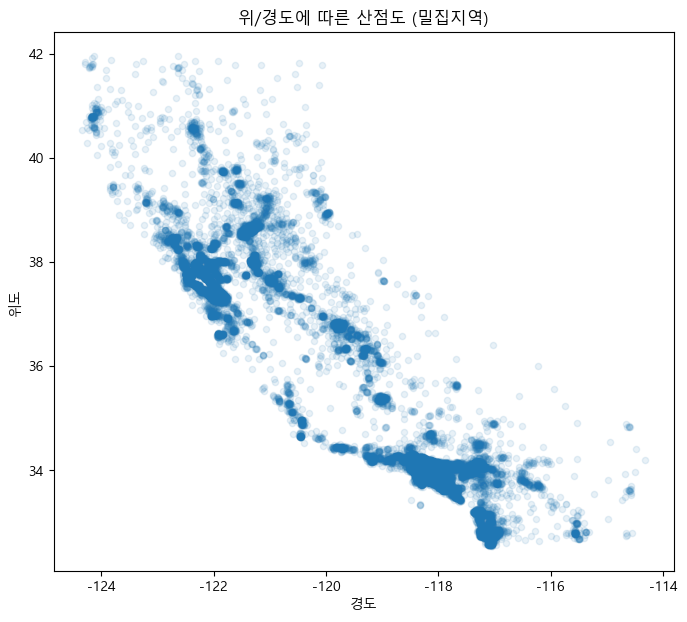

In [13]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(8,7), alpha=0.1)
plt.xlabel('경도')
plt.ylabel('위도')
plt.title('위/경도에 따른 산점도 (밀집지역)')

Text(0, 0.5, '위도')

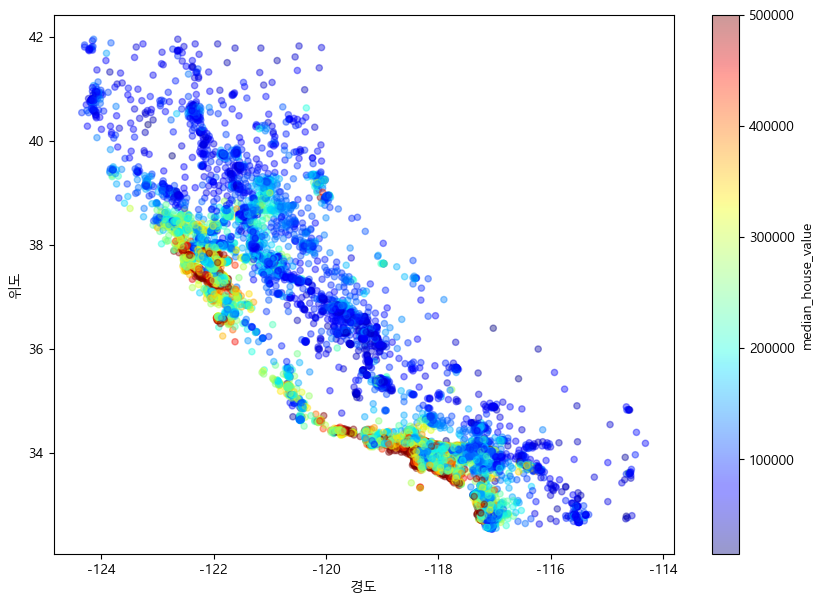

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)

plt.xlabel('경도')
plt.ylabel('위도')
# plt.clabel('주택가격 중앙값')
# plt.legend()
# save_fig("housing_prices_scatterplot")

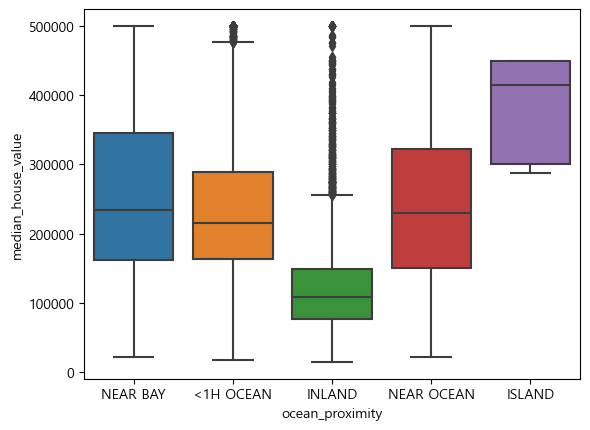

In [15]:
sns.boxplot(x="ocean_proximity", y="median_house_value", data=housing)
plt.show()

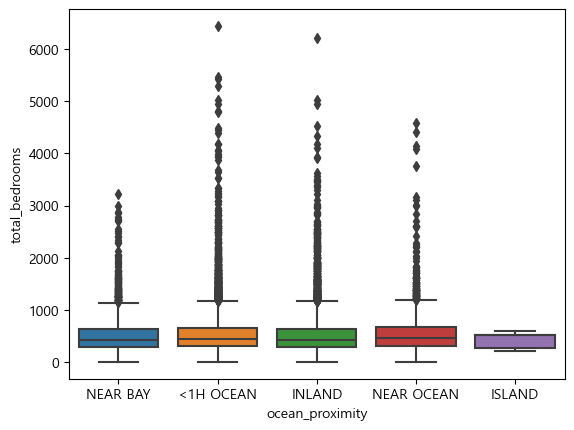

In [16]:
sns.boxplot(x="ocean_proximity", y="total_bedrooms", data=housing)
plt.show()

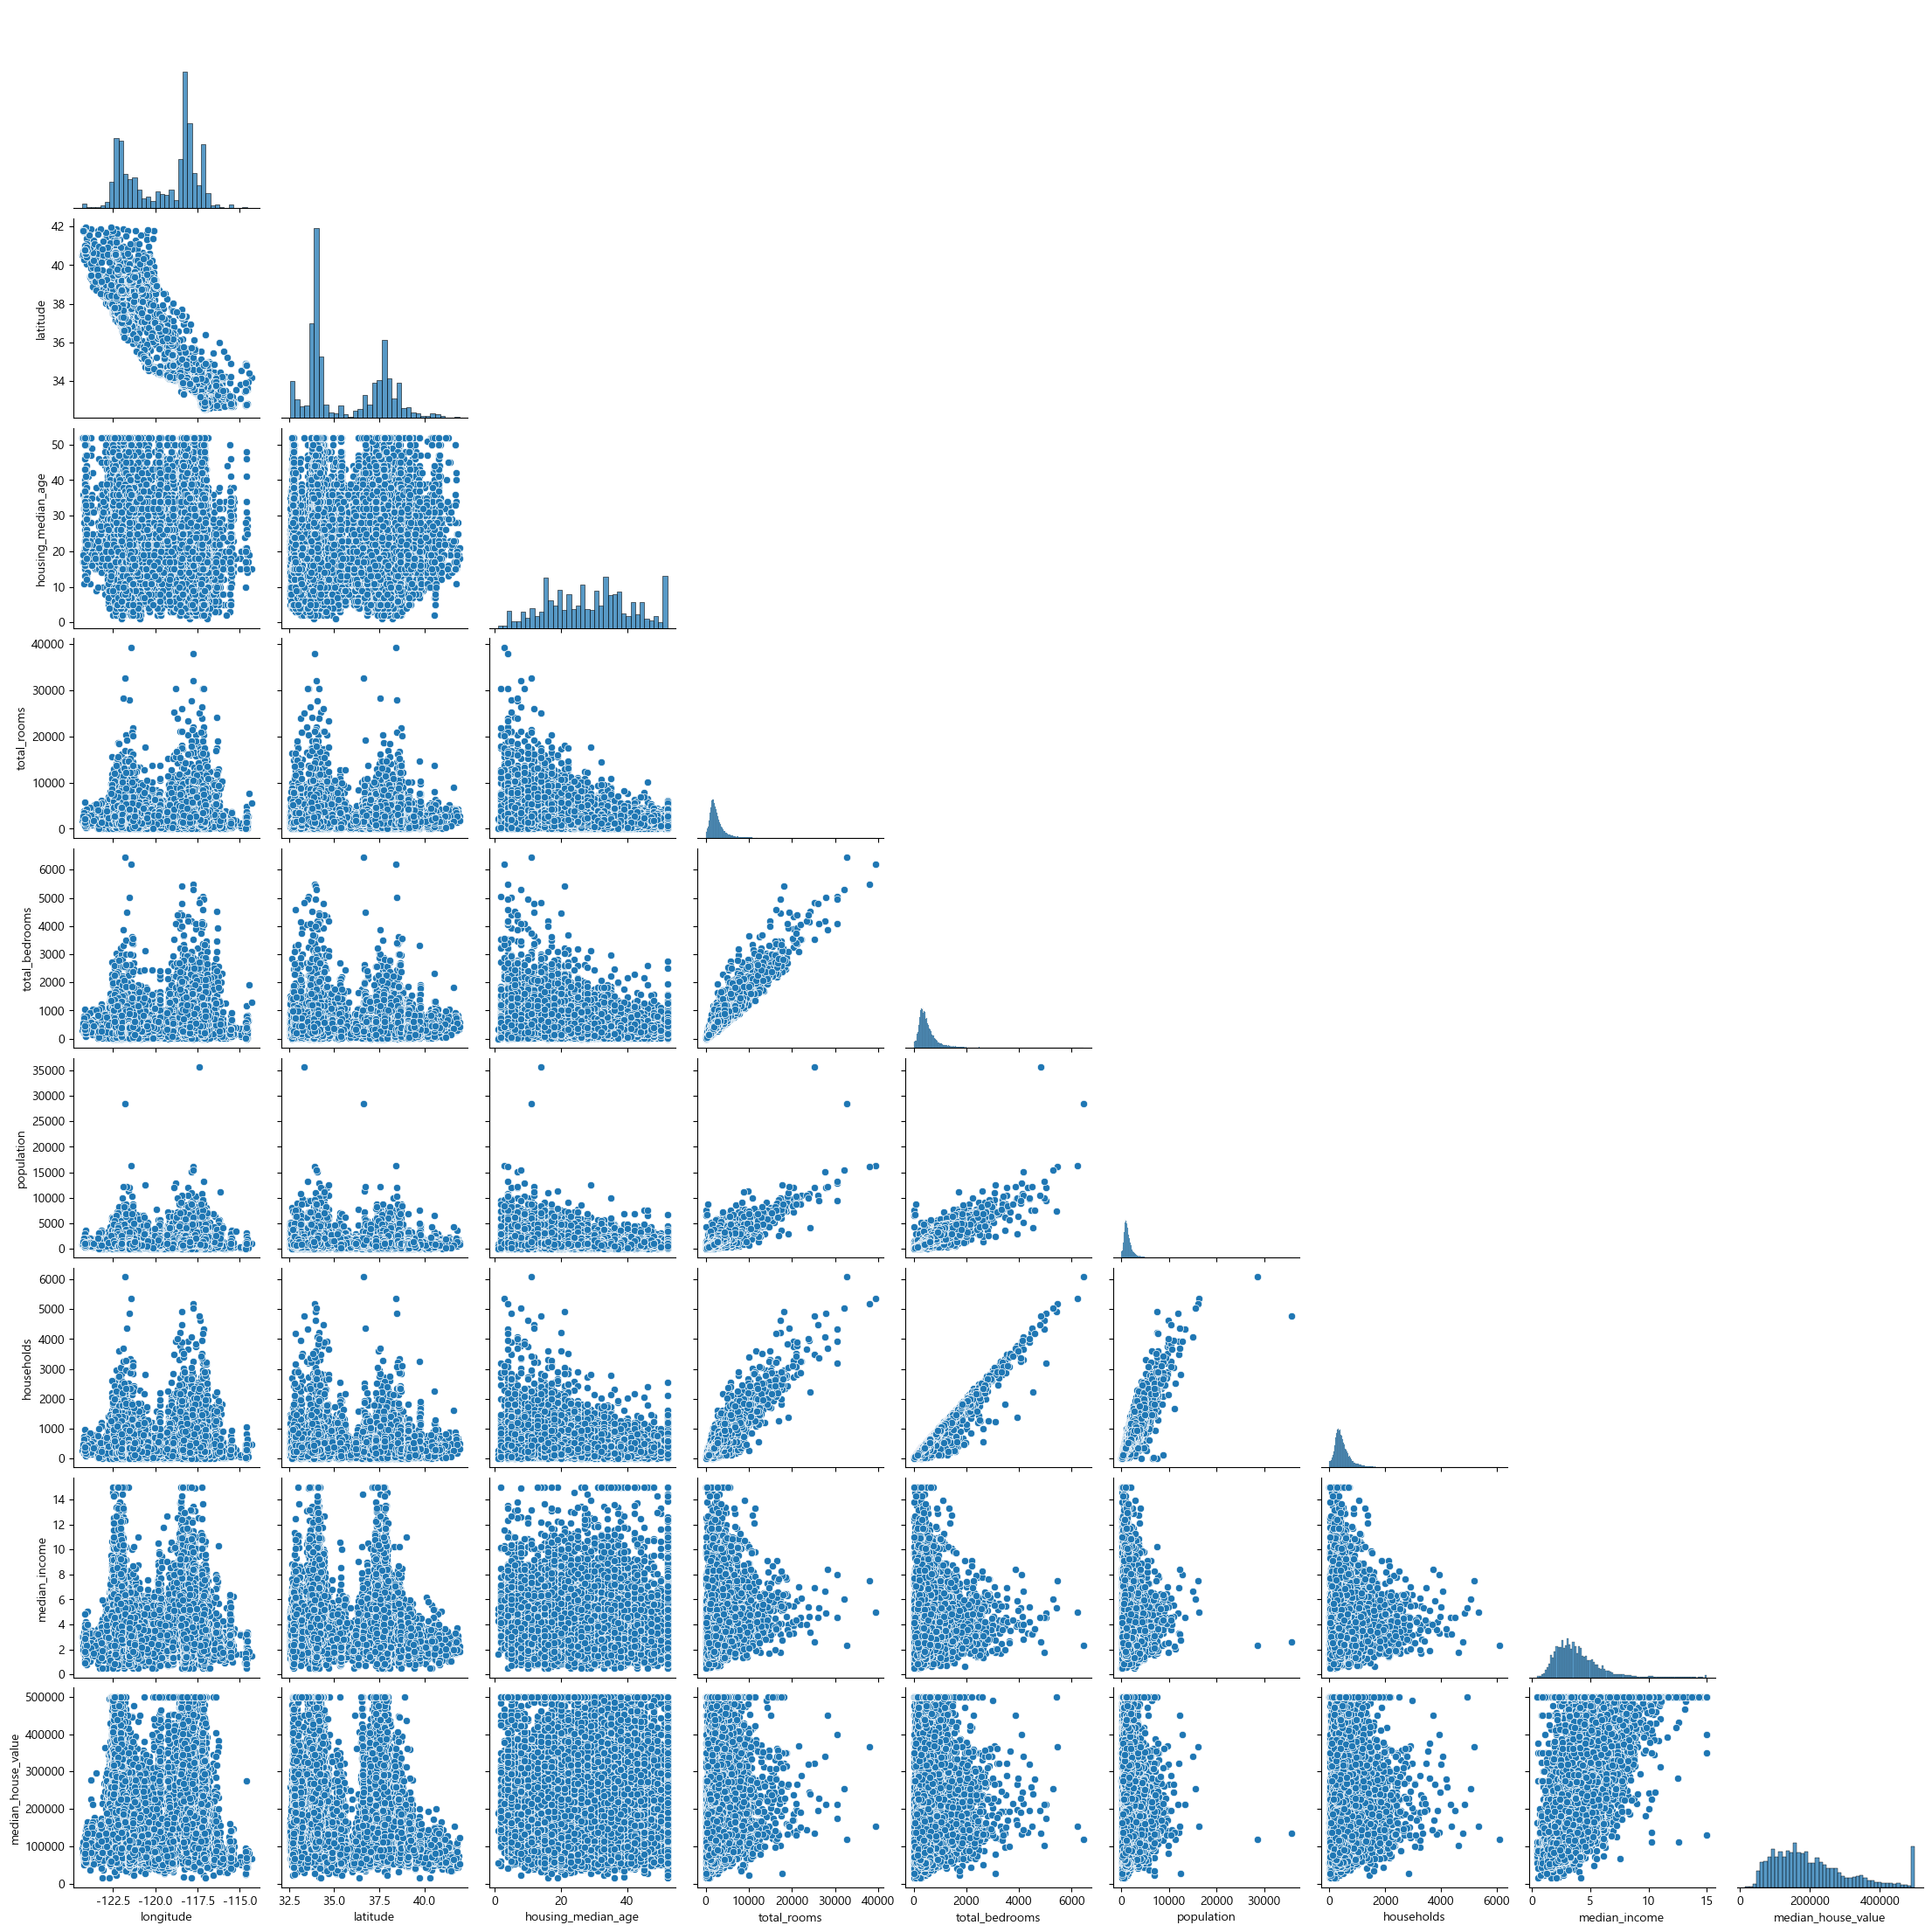

In [17]:
sns.pairplot(housing, corner=True)
plt.show()

#### 1.4. 파생변수 만들고 상관계수 확인하기

In [18]:
housing['rooms_p_household']=housing.total_rooms / housing.households
housing['bedrooms_p_room']=housing.total_bedrooms / housing.total_rooms
housing['population_p_household']=housing.population / housing.households

In [19]:
corr = housing.corr() #corr : 상관관계
corr['median_house_value'].sort_values(ascending=False)

median_house_value        1.000000
median_income             0.688075
rooms_p_household         0.151948
total_rooms               0.134153
housing_median_age        0.105623
households                0.065843
total_bedrooms            0.049686
population_p_household   -0.023737
population               -0.024650
longitude                -0.045967
latitude                 -0.144160
bedrooms_p_room          -0.255880
Name: median_house_value, dtype: float64

In [20]:
# housing.drop(['total_rooms', 'households', 'total_bedrooms', 'population_p_household'], axis=1, inplace=True)

In [21]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_p_household,bedrooms_p_room,population_p_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


#### 1.5. 결측치는 열 평균으로 맞춰줌

In [22]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace = True)
housing['bedrooms_p_room'].fillna(housing['bedrooms_p_room'].mean(), inplace = True)

In [23]:
housing.isna().sum()

longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
rooms_p_household         0
bedrooms_p_room           0
population_p_household    0
dtype: int64

#### 1.6. 범주형 데이터를 One Hot Encoding 하기

In [24]:
# get_dummies : array([0,0,0,1,0],...)
one_hot = pd.get_dummies(housing['ocean_proximity'])
housing = pd.concat([housing, one_hot], axis= 1)
housing.drop(['ocean_proximity'], axis=1, inplace=True)

In [25]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_p_household,bedrooms_p_room,population_p_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1,0


#### 2. 머신러닝

In [26]:
X, y = housing.drop(['median_house_value'], axis=1), housing['median_house_value']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# 80퍼센트는 트레이닝, 20퍼센트까지 테스트 모델로 정한다.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normal = scaler.fit_transform(X_train) # min-max scalling

X_train, X_valid, y_train, y_valid = train_test_split(X_normal, y_train, test_size=0.2, random_state=1) # 여기부터 vaild는 12/20에 설명

#### 2.1. 선형회귀모델

In [28]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_li = linear.predict(X_train)

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_R2 = r2_score(y_train, y_pred_li) # 회귀모델이 데이터를 얼마나 설명하고 있는가 ? (0.66 : 66프로정도 설명하고이따)
lin_mae = mean_absolute_error(y_train, y_pred_li)
print(lin_R2)
print(lin_mae)

0.6607708939793784
48403.46030151271


In [31]:
y_pred_li = linear.predict(X_valid)

In [32]:
lin_R2 = r2_score(y_valid, y_pred_li)
lin_mae = mean_absolute_error(y_valid, y_pred_li)
print(lin_R2)
print(lin_mae)

0.6298089501175896
49795.66471885533


#### 2.2. 의사결정나무

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
y_pred_tr = tree.predict(X_valid)

In [35]:
tree_R2 = r2_score(y_valid, y_pred_tr)
tree_mae = mean_absolute_error(y_valid, y_pred_tr)
print(tree_R2)
print(tree_mae)

0.6501898375995481
43653.93218286406


#### 2.3. 랜덤포레스트

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
y_pred_rf = tree.predict(X_train)

rf_R2 = r2_score(y_train, y_pred_rf)
rf_mae = mean_absolute_error(y_train, y_pred_rf)
print(rf_R2)
print(rf_mae)

1.0
0.0


In [38]:
y_pred_rf = tree.predict(X_valid)

In [39]:
rf_R2 = r2_score(y_valid, y_pred_rf)
rf_mae = mean_absolute_error(y_valid, y_pred_rf)
print(rf_R2)
print(rf_mae)

0.6501898375995481
43653.93218286406


#### 2.4. XGBoost 회귀

In [40]:
# pip install xgboost

In [41]:
import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
y_pred_xgb = xgb_model.predict(X_train)

xgb_R2 = r2_score(y_train, y_pred_xgb)
xgb_mae = mean_absolute_error(y_train, y_pred_xgb)
print(xgb_R2)
print(xgb_mae)

0.9502193083991168
18119.82165554144


In [43]:
y_pred_xgb = xgb_model.predict(X_valid)

In [44]:
xgb_R2 = r2_score(y_valid, y_pred_xgb)
xgb_mae = mean_absolute_error(y_valid, y_pred_xgb)
print(xgb_R2)
print(xgb_mae)

0.8373371821975131
31067.727844478504


#### 2.5. k-fold 교차검증

In [45]:
def display_scores(model, scores):
    print('<<', model, '모델 평가 결과 >>')
    print('평균 RMSE :', scores.mean())
    print('표준편차 :', scores.std())

In [46]:
import numpy as np
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree, X_valid, y_valid, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

lin_scores = cross_val_score(linear, X_valid, y_valid, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

rf_scores = cross_val_score(rf, X_valid, y_valid, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-rf_scores)

xgb_scores = cross_val_score(xgb_model, X_valid, y_valid, scoring='neg_mean_squared_error', cv=10)
xgb_rmse_scores = np.sqrt(-xgb_scores)

In [47]:
display_scores('선형회귀', lin_rmse_scores)
print('\n')
display_scores('의사결정나무', tree_rmse_scores)
print('\n')
display_scores('랜덤포레스트', rf_rmse_scores)
print('\n')
display_scores('XGBoost', xgb_rmse_scores)

<< 선형회귀 모델 평가 결과 >>
평균 RMSE : 71701.09947852974
표준편차 : 5435.356316373728


<< 의사결정나무 모델 평가 결과 >>
평균 RMSE : 76211.62579735732
표준편차 : 4735.833562960381


<< 랜덤포레스트 모델 평가 결과 >>
평균 RMSE : 54838.92527645562
표준편차 : 4333.999480402441


<< XGBoost 모델 평가 결과 >>
평균 RMSE : 53240.65318145496
표준편차 : 3106.8037657985133


#### 3.1. 최종모델의 성능평가

In [48]:
X_test_nor = scaler.transform(X_test)

In [49]:
final_pred = xgb_model.predict(X_test_nor)

In [50]:
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, final_pred)

In [51]:
print('RMSE :', final_rmse)
print('R2 :', final_r2)

RMSE : 49949.169020832756
R2 : 0.8187291844996614


#### 3.2. 예측값과 실제값의 비교 - 시각화

In [52]:
pred = pd.DataFrame(final_pred, columns=['prediction'])
actual = pd.DataFrame(y_test)
actual.reset_index(inplace=True, drop=True)
table = pd.concat([pred, actual], axis=1)

In [53]:
table

,prediction,median_house_value
0,178113.328125,87500.0
1,179157.750000,168400.0
2,282558.750000,279400.0
3,206181.546875,112500.0
4,95957.757812,87100.0
...,...,...
4123,421923.156250,434400.0
4124,309970.062500,274200.0
4125,176531.515625,188600.0
4126,395279.906250,294200.0


<AxesSubplot:>

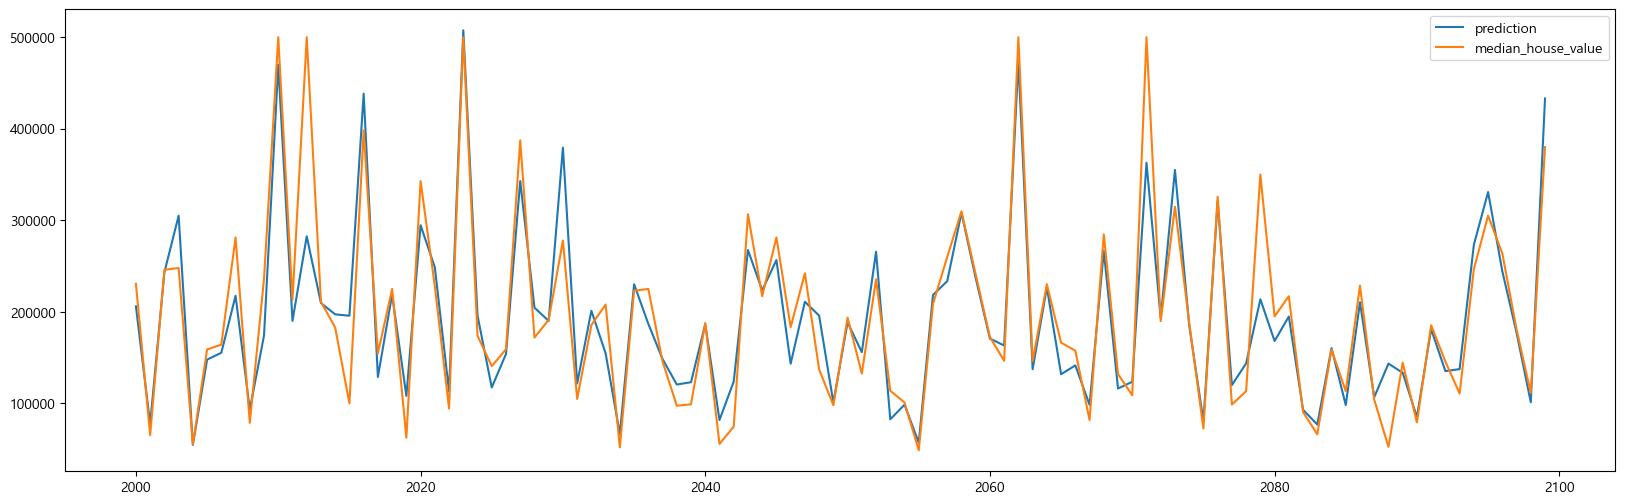

In [54]:
table.iloc[2000:2100,:].plot(figsize=(20,6))

#### 3.3. 변수중요도

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

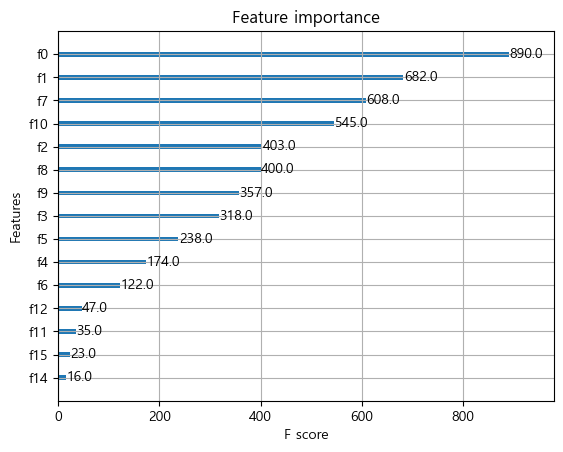

In [55]:
from xgboost import plot_importance
plot_importance(xgb_model)

#### 변수중요도 해석

In [56]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_p_household', 'bedrooms_p_room', 'population_p_household',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')